# Truchet Symmetries Generator

## Coding Symmetries

In [8]:
%gui osx

In [9]:
import random
import py5
import os
import time 
from IPython.display import Image, display

cols, rows = 0, 0
size = 100
tiles = []
symmetry_type = "C4"
num_patterns = 1
base_seed = 0
pattern_index = 0
seeds = []
generated_patterns = set()

def setup():
    global cols, rows
    py5.size(400, 400)
    cols = py5.width // size
    rows = py5.height // size
    py5.no_loop()
    os.makedirs("patterns", exist_ok=True)
    generate_and_save_patterns(num_patterns, base_seed)

def draw():
    global pattern_index
    if pattern_index < num_patterns:
        py5.background(225)
        for row in tiles:
            for tile in row:
                tile.display()
        py5.save_frame(f"patterns/pattern_{symmetry_type}_{size}_{pattern_index}.jpg")
        pattern_index += 1
        generate_new_pattern(pattern_index)
    else:
        py5.no_loop()

class Tile:
    def __init__(self, x, y, type):
        self.x = x
        self.y = y
        self.type = type

    def display(self):
        py5.fill(0)
        py5.push_matrix()
        py5.translate(self.x, self.y)
        py5.begin_shape()
        if self.type == 0:
            py5.vertex(size, 0)
            py5.vertex(size, size)
            py5.vertex(0, size)
        elif self.type == 1:
            py5.vertex(size, 0)
            py5.vertex(0, 0)
            py5.vertex(0, size)
        elif self.type == 2:
            py5.vertex(size, size)
            py5.vertex(0, 0)
            py5.vertex(0, size)
        elif self.type == 3:
            py5.vertex(size, size)
            py5.vertex(0, 0)
            py5.vertex(size, 0)
        py5.end_shape()
        py5.pop_matrix()

def create_symmetric_pattern(symmetry_type):
    pattern = []

    if symmetry_type == "D4":
        for y in range(rows // 2):
            row = []
            for x in range(cols // 2):
                if x < y:
                    type = int(random.random() * 2)
                elif x == y:
                    type = int(random.random() * 2)
                else:
                    type = int(random.random() * 4)
                row.append(Tile(x * size, y * size, type))
            pattern.append(row)

        for y in range(rows // 2):
            for x in range(cols // 2):
                if x > y:
                    type = pattern[y][x].type
                    pattern[x][y] = Tile(y * size, x * size, mirror_type_diagonally(type))

        for y in range(rows // 2):
            for x in range(cols // 2):
                type = pattern[y][x].type
                pattern[y].append(Tile((cols - x - 1) * size, y * size, mirror_type_horizontally(type)))

        for y in range(rows // 2):
            bottom_row = []
            for x in range(cols // 2):
                type = pattern[y][x].type
                bottom_row.append(Tile(x * size, (rows - y - 1) * size, mirror_type_vertically(type)))
            pattern.append(bottom_row)

        for y in range(rows // 2):
            for x in range(cols // 2):
                type = pattern[y][cols // 2 + x].type
                pattern[rows // 2 + y].append(Tile((cols - x - 1) * size, (rows - y - 1) * size, mirror_type_vertically(type)))

    elif symmetry_type == "C4":
        for y in range(rows // 2):
            row = []
            for x in range(cols // 2):
                type = int(random.random() * 4)
                row.append(Tile(x * size, y * size, type))
            pattern.append(row)

        for y in range(rows // 2):
            pattern[y] += [None] * (cols // 2)

        for y in range(rows // 2, rows):
            pattern.append([None] * cols)

        for y in range(rows // 2):
            for x in range(cols // 2):
                type = pattern[y][x].type
                new_type = rotate_type_clockwise(type)
                pattern[x][cols - y - 1] = Tile((cols - y - 1) * size, x * size, new_type)

        for y in range(rows // 2):
            for x in range(cols // 2):
                type = pattern[x][cols - y - 1].type
                new_type = rotate_type_clockwise(type)
                pattern[rows - y - 1][cols - x - 1] = Tile((cols - x - 1) * size, (rows - y - 1) * size, new_type)

        for y in range(rows // 2):
            for x in range(cols // 2):
                type = pattern[rows - y - 1][cols - x - 1].type
                new_type = rotate_type_clockwise(type)
                pattern[rows - x - 1][y] = Tile(y * size, (rows - x - 1) * size, new_type)

    elif symmetry_type == "D2_1":
        for y in range(rows // 2):
            row = []
            for x in range(cols // 2):
                type = int(random.random() * 4)
                row.append(Tile(x * size, y * size, type))
            pattern.append(row)

        for y in range(rows // 2):
            for x in range(cols // 2):
                type = pattern[y][x].type
                pattern[y].append(Tile((cols - x - 1) * size, y * size, mirror_type_horizontally(type)))

        for y in range(rows // 2):
            bottom_row = []
            for x in range(cols // 2):
                type = pattern[y][x].type
                bottom_row.append(Tile(x * size, (rows - y - 1) * size, mirror_type_vertically(type)))
            pattern.append(bottom_row)

        for y in range(rows // 2):
            for x in range(cols // 2):
                type = pattern[y][cols // 2 + x].type
                pattern[rows // 2 + y].append(Tile((cols - x - 1) * size, (rows - y - 1) * size, mirror_type_vertically(type)))

    return pattern

def pattern_hash(pattern):
    """Generate a hashable representation of the pattern"""
    return tuple(tuple(tile.type for tile in row) for row in pattern)

def mirror_type_horizontally(type):
    return [2, 3, 0, 1][type]

def mirror_type_vertically(type):
    return [3, 2, 1, 0][type]

def mirror_type_diagonally(type):
    return [0, 1, 3, 2][type]

def rotate_type_clockwise(type):
    return [2, 3, 1, 0][type]

def generate_and_save_patterns(num_patterns, base_seed):
    global seeds
    seeds = [base_seed + i for i in range(num_patterns)]
    index = 0
    for seed in seeds:
        if index >= num_patterns:
            break
        if generate_and_save_pattern(seed, index):
            index += 1
    print(f"Generated {index} unique patterns out of {num_patterns} requested.")

def generate_and_save_pattern(seed, index):
    random.seed(seed)
    global tiles
    attempt = 0
    max_attempts = 10000  # Adjust as necessary to ensure sufficient attempts
    while attempt < max_attempts:
        tiles = create_symmetric_pattern(symmetry_type)
        hashed_pattern = pattern_hash(tiles)
        if hashed_pattern not in generated_patterns:
            generated_patterns.add(hashed_pattern)
            py5.redraw()
            py5.save_frame(f"patterns/pattern_{symmetry_type}_{size}_{index}.jpg")
            return True
        attempt += 1
    return False  # Indicates that no unique pattern was found after max_attempts

def generate_new_pattern(index):
    if index < num_patterns:
        random.seed(base_seed + index)
        global tiles
        attempt = 0
        max_attempts = 200  # Adjust as necessary to ensure sufficient attempts
        while attempt < max_attempts:
            tiles = create_symmetric_pattern(symmetry_type)
            hashed_pattern = pattern_hash(tiles)
            if hashed_pattern not in generated_patterns:
                generated_patterns.add(hashed_pattern)
                py5.redraw()
                return
            attempt += 1
        print(f"Failed to generate a unique pattern after {max_attempts} attempts.")


## Saving Symmetries

### D4

**2 x 2 Shapes**

There are 2 unique patterns.

In [3]:
size = 200
symmetry_type = "D4"
num_patterns = 2
base_seed = 0
pattern_index = 0

def setup():
    global cols, rows, tiles
    py5.size(400, 400)
    cols = py5.width // size
    rows = py5.height // size
    tiles = create_symmetric_pattern(symmetry_type)

py5.run_sketch()

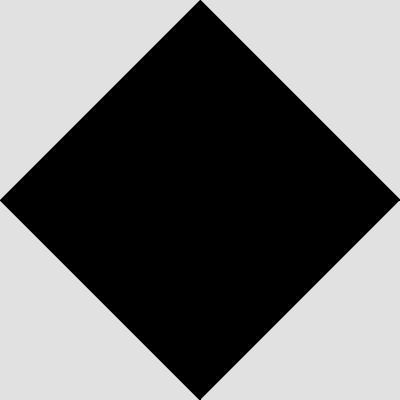

In [6]:
filename = f"{symmetry_type}_{size}.png"
py5.save_frame(filename)
display(Image(filename=filename))

**4 x 4 Shapes**

There are 16 unique patterns.

In [7]:
size = 100
symmetry_type = "D4"
num_patterns = 16
base_seed = 0
pattern_index = 0

def setup():
    global cols, rows, tiles
    py5.size(400, 400)
    cols = py5.width // size
    rows = py5.height // size
    tiles = create_symmetric_pattern(symmetry_type)

py5.run_sketch()

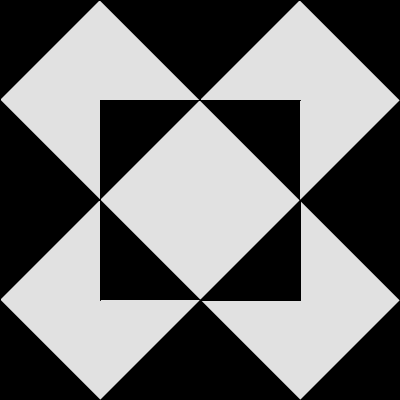

In [8]:
filename = f"{symmetry_type}_{size}.png"
py5.save_frame(filename)
display(Image(filename=filename))

**8 x 8 Shapes**

In [12]:
size = 50
symmetry_type = "D4"
num_patterns = 50
base_seed = 0
pattern_index = 0

def setup():
    global cols, rows, tiles
    py5.size(400, 400)
    cols = py5.width // size
    rows = py5.height // size
    tiles = create_symmetric_pattern(symmetry_type)

py5.run_sketch()

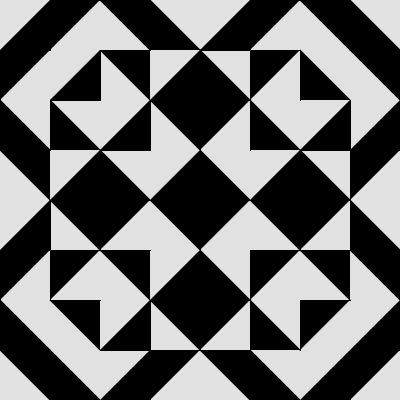

In [11]:
filename = f"{symmetry_type}_{size}.png"
py5.save_frame(filename)
display(Image(filename=filename))

**16 x 16 Shapes**

In [13]:
size = 25
symmetry_type = "D4"
num_patterns = 50
base_seed = 0
pattern_index = 0

def setup():
    global cols, rows, tiles
    py5.size(400, 400)
    cols = py5.width // size
    rows = py5.height // size
    tiles = create_symmetric_pattern(symmetry_type)

py5.run_sketch()

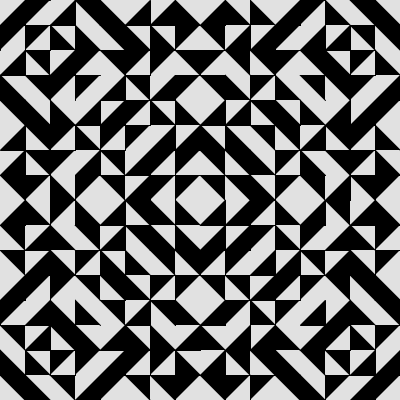

In [14]:
filename = f"{symmetry_type}_{size}.png"
py5.save_frame(filename)
display(Image(filename=filename))

### C4

**2 x 2 Shapes**

There is 1 unique pattern.

In [19]:
size = 200
symmetry_type = "C4"
num_patterns = 1
base_seed = 0
pattern_index = 0

def setup():
    global cols, rows, tiles
    py5.size(400, 400)
    cols = py5.width // size
    rows = py5.height // size
    tiles = create_symmetric_pattern(symmetry_type)

py5.run_sketch()

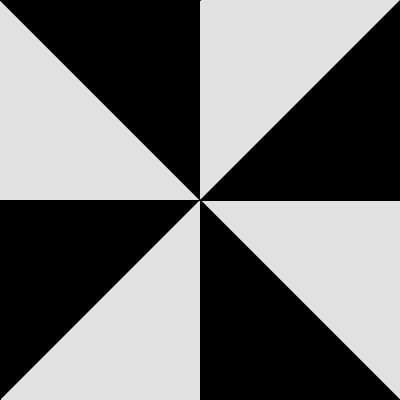

In [20]:
filename = f"{symmetry_type}_{size}.png"
py5.save_frame(filename)
display(Image(filename=filename))

**4 x 4 Shapes**

There are 120 unique patterns.

In [21]:
size = 100
symmetry_type = "C4"
num_patterns = 50
base_seed = 0
pattern_index = 0

def setup():
    global cols, rows, tiles
    py5.size(400, 400)
    cols = py5.width // size
    rows = py5.height // size
    tiles = create_symmetric_pattern(symmetry_type)

py5.run_sketch()

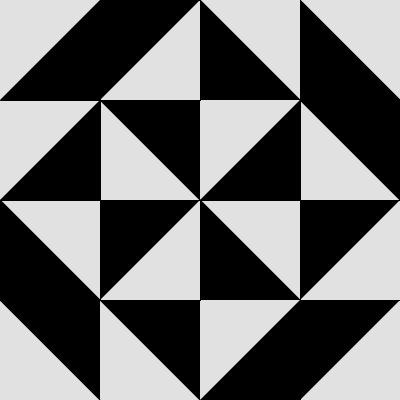

In [22]:
filename = f"{symmetry_type}_{size}.png"
py5.save_frame(filename)
display(Image(filename=filename))

**8 x 8 Shapes**

In [12]:
size = 50
symmetry_type = "C4"
num_patterns = 50
base_seed = 0
pattern_index = 0

def setup():
    global cols, rows, tiles
    py5.size(400, 400)
    cols = py5.width // size
    rows = py5.height // size
    tiles = create_symmetric_pattern(symmetry_type)

py5.run_sketch()

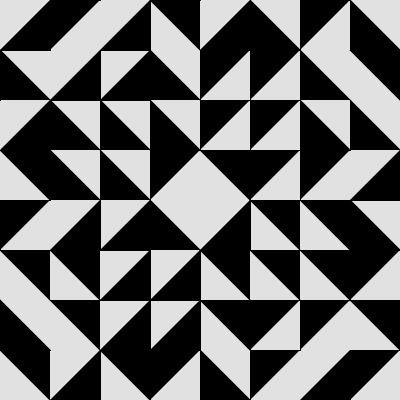

In [24]:
filename = f"{symmetry_type}_{size}.png"
py5.save_frame(filename)
display(Image(filename=filename))

**16 x 16 Shapes**

In [3]:
size = 25
symmetry_type = "C4"
num_patterns = 50
base_seed = 0
pattern_index = 0

def setup():
    global cols, rows, tiles
    py5.size(400, 400)
    cols = py5.width // size
    rows = py5.height // size
    tiles = create_symmetric_pattern(symmetry_type)

py5.run_sketch()

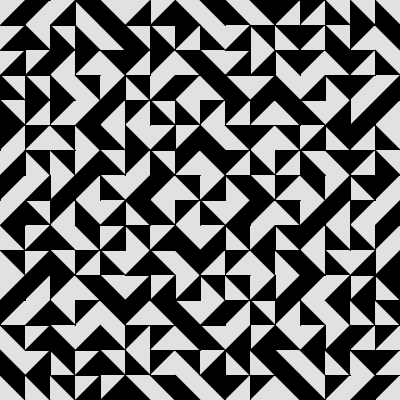

In [4]:
filename = f"{symmetry_type}_{size}.png"
py5.save_frame(filename)
display(Image(filename=filename))

### D2

**2 x 2 Shapes**

In [11]:
size = 200
symmetry_type = "D2_1"
num_patterns = 16
base_seed = 0
pattern_index = 0

def setup():
    global cols, rows, tiles
    py5.size(400, 400)
    cols = py5.width // size
    rows = py5.height // size
    tiles = create_symmetric_pattern(symmetry_type)

py5.run_sketch()

Failed to generate a unique pattern after 200 attempts.
Failed to generate a unique pattern after 200 attempts.
Failed to generate a unique pattern after 200 attempts.
Failed to generate a unique pattern after 200 attempts.
Failed to generate a unique pattern after 200 attempts.
Failed to generate a unique pattern after 200 attempts.
Failed to generate a unique pattern after 200 attempts.
Failed to generate a unique pattern after 200 attempts.
Failed to generate a unique pattern after 200 attempts.
Failed to generate a unique pattern after 200 attempts.
Failed to generate a unique pattern after 200 attempts.


In [ ]:
filename = f"{symmetry_type}_{size}.png"
py5.save_frame(filename)
display(Image(filename=filename))

**8 x 8 Shapes**

In [13]:
size = 50
symmetry_type = "D2_1"
num_patterns = 16
base_seed = 0
pattern_index = 0

def setup():
    global cols, rows, tiles
    py5.size(400, 400)
    cols = py5.width // size
    rows = py5.height // size
    tiles = create_symmetric_pattern(symmetry_type)

py5.run_sketch()

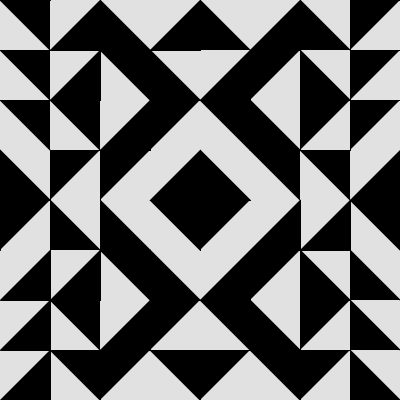

In [14]:
filename = f"{symmetry_type}_{size}.png"
py5.save_frame(filename)
display(Image(filename=filename))